In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path

In [85]:
#get the 2010 census tracts in NYC
#https://s3.amazonaws.com/tripdata/index.html for the trip data
cenTract = gpd.read_file('../Data/NYC/CensusTracts/NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp')

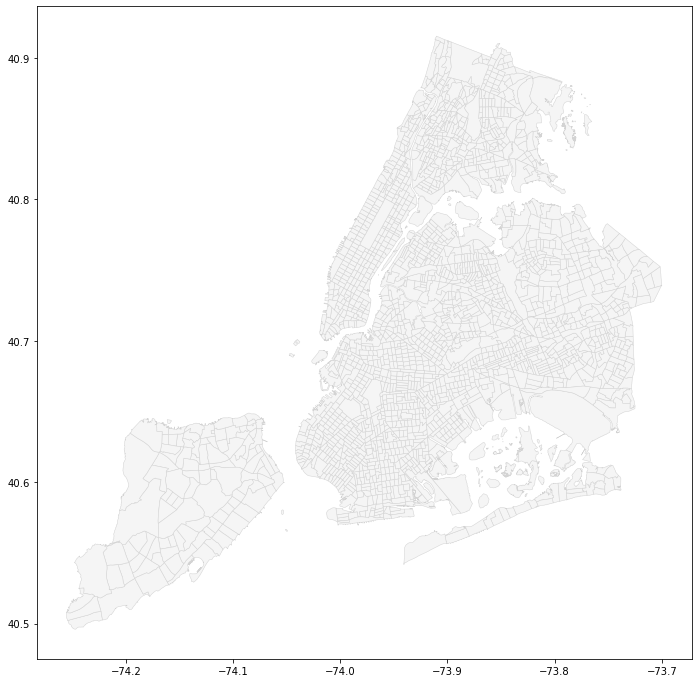

In [3]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

In [4]:
#removing staten island census tracts because they are not in the bike data
cenTract = cenTract[cenTract['BoroName'] != 'Staten Island']

In [5]:
cenTract

OBJECTID CTLabel BoroCode   BoroName  CT2010 BoroCT2010 CDEligibil  \
1            2      98        1  Manhattan  009800    1009800          I   
2            3     102        1  Manhattan  010200    1010200          I   
3            4     104        1  Manhattan  010400    1010400          I   
4            5     113        1  Manhattan  011300    1011300          I   
5            6  114.02        1  Manhattan  011402    1011402          I   
...        ...     ...      ...        ...     ...        ...        ...   
2160      2161      48        1  Manhattan  004800    1004800          I   
2161      2162     506        3   Brooklyn  050600    3050600          E   
2162      2163  508.01        3   Brooklyn  050801    3050801          E   
2163      2164     157        1  Manhattan  015700    1015700          I   
2164      2165     159        1  Manhattan  015900    1015900          I   

     NTACode                        NTAName  PUMA    Shape__Are   Shape__Len  \
1       MN19        Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811   
2       MN17          Midtown-Midtown South  3807  1.860993e+06  5687.802439   
3       MN17          Midtown-Midtown South  3807  1.864600e+06  5693.036367   
4       MN17          Midtown-Midtown South  3807  1.890907e+06  5699.860641   
5       MN40  Upper East Side-Carnegie Hill  3805  1.063547e+06  4125.256029   
...      ...                            ...   ...           ...          ...   
2160    MN21                       Gramercy  3808  1.920852e+06  5539.378859   
2161    BK42                       Flatbush  4015  1.771606e+06  6696.151115   
2162    BK42                       Flatbush  4015  8.437396e+05  3754.807787   
2163    MN14                 Lincoln Square  3806  1.958587e+06  5778.309362   
2164    MN14                 Lincoln Square  3806  1.874866e+06  6435.884250   

                                               geometry  
1     POLYGON ((-73.96433 40.75639, -73.96479 40.755...  
2     POLYGON ((-73.97124 40.76094, -73.97170 40.760...  
3     POLYGON ((-73.97446 40.76230, -73.97492 40.761...  
4     POLYGON ((-73.98412 40.75485, -73.98460 40.754...  
5     POLYGON ((-73.96476 40.76407, -73.96521 40.763...  
...                                                 ...  
2160  POLYGON ((-73.98021 40.73439, -73.98038 40.734...  
2161  POLYGON ((-73.96219 40.64980, -73.96308 40.649...  
2162  POLYGON ((-73.95871 40.65040, -73.95998 40.650...  
2163  POLYGON ((-73.97500 40.77754, -73.97546 40.776...  
2164  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  

[2055 rows x 13 columns]

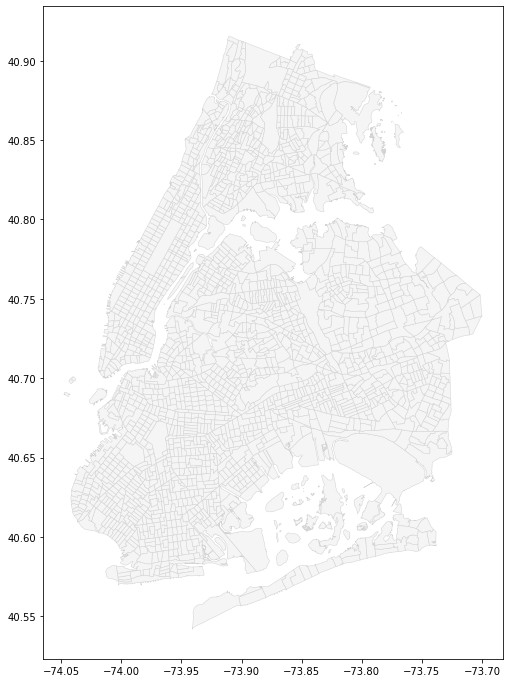

In [6]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

In [7]:
#get the station locations from June 2013
nyc_201306_df = pd.read_csv('../Data/NYC/TripData/201306-citibike-tripdata.csv')
nyc_201306_df

tripduration      starttime     stoptime  start_station_id  \
0                695    6/1/13 0:00  6/1/13 0:11               444   
1                693    6/1/13 0:00  6/1/13 0:11               444   
2               2059    6/1/13 0:00  6/1/13 0:35               406   
3                123    6/1/13 0:01  6/1/13 0:03               475   
4               1521    6/1/13 0:01  6/1/13 0:26              2008   
...              ...            ...          ...               ...   
577698           925  6/30/13 23:59  7/1/13 0:14               509   
577699           279  6/30/13 23:59  7/1/13 0:04               116   
577700           161  6/30/13 23:59  7/1/13 0:02               443   
577701           909  6/30/13 23:59  7/1/13 0:14               509   
577702           634    7/1/13 0:00  7/1/13 0:10               164   

            start_station_name  start_station_latitude  \
0           Broadway & W 24 St               40.742354   
1           Broadway & W 24 St               40.742354   
2       Hicks St & Montague St               40.695128   
3          E 15 St & Irving Pl               40.735243   
4        Little West St & 1 Pl               40.705693   
...                        ...                     ...   
577698         9 Ave & W 22 St               40.745497   
577699         W 17 St & 8 Ave               40.741776   
577700    Bedford Ave & S 9 St               40.708531   
577701         9 Ave & W 22 St               40.745497   
577702         E 47 St & 2 Ave               40.753231   

        start_station_longitude  end_station_id        end_station_name  \
0                    -73.989151           434.0         9 Ave & W 18 St   
1                    -73.989151           434.0         9 Ave & W 18 St   
2                    -73.995951           406.0  Hicks St & Montague St   
3                    -73.987586           262.0         Washington Park   
4                    -74.016777           310.0     State St & Smith St   
...                         ...             ...                     ...   
577698               -74.001971           462.0        W 22 St & 10 Ave   
577699               -74.001497           494.0         W 26 St & 8 Ave   
577700               -73.964090           282.0      Kent Ave & S 11 St   
577701               -74.001971           462.0        W 22 St & 10 Ave   
577702               -73.970325           504.0         1 Ave & E 16 St   

        end_station_latitude  end_station_longitude  bikeid    usertype  \
0                  40.743174             -74.003664   19678  Subscriber   
1                  40.743174             -74.003664   16649  Subscriber   
2                  40.695128             -73.995951   19599    Customer   
3                  40.691782             -73.973730   16352  Subscriber   
4                  40.689269             -73.989129   15567  Subscriber   
...                      ...                    ...     ...         ...   
577698             40.746920             -74.004519   15250  Subscriber   
577699             40.747348             -73.997236   19411    Customer   
577700             40.707645             -73.968415   18910  Subscriber   
577701             40.746920             -74.004519   16108    Customer   
577702             40.732219             -73.981656   16950    Customer   

        birth_year  gender  
0           1983.0       1  
1           1984.0       1  
2              NaN       0  
3           1960.0       1  
4           1983.0       1  
...            ...     ...  
577698      1964.0       1  
577699         NaN       0  
577700      1972.0       2  
577701         NaN       0  
577702         NaN       0  

[577703 rows x 15 columns]

In [8]:
stations_201306_df = nyc_201306_df.drop_duplicates(subset='start_station_id')
stations_201306_df = stations_201306_df.reset_index()
stations_201306_df = stations_201306_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 'bikeid',
                                                      'usertype','birth_year','gender','end_station_id', 'end_station_name',
                                                     'end_station_latitude', 'end_station_longitude'])
stations_201306_df = stations_201306_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'station_name',
                                                         'start_station_latitude': 'lat', 'start_station_longitude': 'long'})
stations_201306_df

station_id              station_name        lat       long
0           444        Broadway & W 24 St  40.742354 -73.989151
1           406    Hicks St & Montague St  40.695128 -73.995951
2           475       E 15 St & Irving Pl  40.735243 -73.987586
3          2008     Little West St & 1 Pl  40.705693 -74.016777
4           485           W 37 St & 5 Ave  40.750380 -73.983390
..          ...                       ...        ...        ...
332         248     Laight St & Hudson St  40.721854 -74.007718
333         387   Centre St & Chambers St  40.712733 -74.004607
334        3000                 MLSWKiosk  40.755467 -73.986536
335         160   E 37 St & Lexington Ave  40.748158 -73.978462
336         409  DeKalb Ave & Skillman St  40.690649 -73.956431

[337 rows x 4 columns]

In [9]:
end_stations_201306_df = nyc_201306_df.drop_duplicates(subset='end_station_id')
end_stations_201306_df = end_stations_201306_df.reset_index()
end_stations_201306_df = end_stations_201306_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 
                                                              'bikeid','usertype','birth_year','gender', 'start_station_id',
                                                             'start_station_name','start_station_latitude','start_station_longitude'])
end_stations_201306_df = end_stations_201306_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'station_name',
                                                               'end_station_latitude': 'lat', 'end_station_longitude': 'long'})
end_stations_201306_df

station_id                station_name        lat       long
0         434.0             9 Ave & W 18 St  40.743174 -74.003664
1         406.0      Hicks St & Montague St  40.695128 -73.995951
2         262.0             Washington Park  40.691782 -73.973730
3         310.0         State St & Smith St  40.689269 -73.989129
4         532.0             S 5 Pl & S 5 St  40.710451 -73.960876
..          ...                         ...        ...        ...
333       431.0  Hanover Pl & Livingston St  40.688646 -73.982634
334      3000.0                   MLSWKiosk  40.755467 -73.986536
335       409.0    DeKalb Ave & Skillman St  40.690649 -73.956431
336       160.0     E 37 St & Lexington Ave  40.748158 -73.978462
337       153.0             E 40 St & 5 Ave  40.752062 -73.981632

[338 rows x 4 columns]

In [10]:
nyc_201306_stations_df = pd.concat([stations_201306_df, end_stations_201306_df])
nyc_201306_stations_df = nyc_201306_stations_df.drop_duplicates(subset='station_id')
nyc_201306_stations_df = nyc_201306_stations_df.reset_index()
nyc_201306_stations_df = nyc_201306_stations_df.drop(columns=['index'])
nyc_201306_stations_df = nyc_201306_stations_df.drop(337)
nyc_201306_stations_df

station_id              station_name        lat       long
0         444.0        Broadway & W 24 St  40.742354 -73.989151
1         406.0    Hicks St & Montague St  40.695128 -73.995951
2         475.0       E 15 St & Irving Pl  40.735243 -73.987586
3        2008.0     Little West St & 1 Pl  40.705693 -74.016777
4         485.0           W 37 St & 5 Ave  40.750380 -73.983390
..          ...                       ...        ...        ...
332       248.0     Laight St & Hudson St  40.721854 -74.007718
333       387.0   Centre St & Chambers St  40.712733 -74.004607
334      3000.0                 MLSWKiosk  40.755467 -73.986536
335       160.0   E 37 St & Lexington Ave  40.748158 -73.978462
336       409.0  DeKalb Ave & Skillman St  40.690649 -73.956431

[337 rows x 4 columns]

In [11]:
nyc_201306_stations_df.to_csv('../Data/NYC/nyc_201306_stations.csv')

In [12]:
#convert hr_df to geodataframe to plot the bike stations on map
geometry = [Point(xy) for xy in zip(nyc_201306_stations_df.long, nyc_201306_stations_df.lat)]
crs = 4326
nyc_201306_gdf = gpd.GeoDataFrame(nyc_201306_stations_df, crs=crs, geometry=geometry)

Text(0.5, 1.0, 'June 2013: Citi Bike Station Locations - New York City')

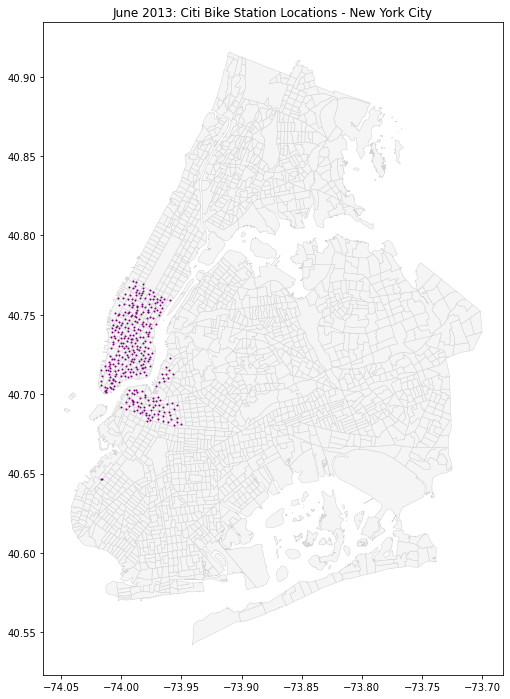

In [13]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
nyc_201306_gdf.plot(ax=ax, color="Purple", markersize=1)
plt.title("June 2013: Citi Bike Station Locations - New York City")

In [14]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    geometry = [Point(xy) for xy in zip(station_df.long, station_df.lat)]
    crs = 4326
    station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    return station_gdf

In [15]:
def station_df(list_df, filenames=['nyc_stations.csv']):
    filtered_gdf = []
    count = 0
    
    #for every df in the list of df sent in
    for df in list_df:
        print("file: " + filenames[count])
        df.columns = df.columns.str.lower()
        #rename all of the columns to get rid of spaces
        df = df.rename(columns={'start station id': 'start_station_id', 'start station name': 'start_station_name',
                                       'start station latitude': 'start_station_latitude', 
                                        'start station longitude': 'start_station_longitude', 
                                       'end station id': 'end_station_id', 'end station name': 'end_station_name',
                                       'end station latitude': 'end_station_latitude', 
                                        'end station longitude': 'end_station_longitude', 'birth year': 'birth_year',
                                       'trip duration': 'tripduration', 'start time': 'starttime', 'stop time': 'stoptime',
                                        'bike id': 'bikeid', 'user type': 'usertype'})
        
        try:
            df['start_station_id'] = df.start_station_id.astype(float)
            df['end_station_id'] = df.start_station_id.astype(float)
        except:
            print("unable to convert station id to float")
        ##filter for start station locations
        stations_df = df.drop_duplicates(subset='start_station_id')
        stations_df = stations_df.reset_index()
        stations_df = stations_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 'bikeid',
                                                      'usertype','birth_year','gender','end_station_id', 'end_station_name',
                                                     'end_station_latitude', 'end_station_longitude'])
        stations_df = stations_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'station_name',
                                                         'start_station_latitude': 'lat', 'start_station_longitude': 'long'})
        ## filter for end station locations
        end_stations_df = df.drop_duplicates(subset='end_station_id')
        end_stations_df = end_stations_df.reset_index()
        end_stations_df = end_stations_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 
                                                              'bikeid','usertype','birth_year','gender', 'start_station_id',
                                                             'start_station_name','start_station_latitude','start_station_longitude'])
        end_stations_df = end_stations_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'station_name',
                                                               'end_station_latitude': 'lat', 'end_station_longitude': 'long'})

        #concat the two dataframes together and drop duplicates once more
        nyc_stations_df = pd.concat([stations_df, end_stations_df])
        nyc_stations_df = nyc_stations_df.drop_duplicates(subset='station_id')
        nyc_stations_df = nyc_stations_df.reset_index()
        nyc_stations_df = nyc_stations_df.drop(columns=['index'])

        #save the data frame
        try:
            nyc_stations_df.to_csv('../Data/NYC/stations/'+filenames[count])
        except:
            print('Cannot convert dataframe to csv.')
        
        filtered_gdf.append(geoify_df(nyc_stations_df))
        count += 1
        
    return filtered_gdf

## Showing Growth of System over time

In [16]:
#set path to access all json files in January folder
data_dir = Path('../Data/NYC') / 'TripData/2020'
data_files = data_dir.glob('*.csv')

list_df = []
filenames = []

for file in data_files:
    print(file)
    df = pd.read_csv(file, low_memory=False)
    list_df.append(df)
    filepath = str(file).split('/')
    filename = filepath[5]
    filenames.append(filename)
    
filtered_gdf = station_df(list_df, filenames)

../Data/NYC/TripData/2020/202006-citibike-tripdata.csv
../Data/NYC/TripData/2020/202010-citibike-tripdata.csv
../Data/NYC/TripData/2020/202004-citibike-tripdata.csv
../Data/NYC/TripData/2020/202012-citibike-tripdata.csv
../Data/NYC/TripData/2020/202002-citibike-tripdata.csv
../Data/NYC/TripData/2020/202008-citibike-tripdata.csv
../Data/NYC/TripData/2020/202011-citibike-tripdata.csv
../Data/NYC/TripData/2020/202007-citibike-tripdata.csv
../Data/NYC/TripData/2020/202005-citibike-tripdata.csv
../Data/NYC/TripData/2020/202003-citibike-tripdata.csv
../Data/NYC/TripData/2020/202009-citibike-tripdata.csv
../Data/NYC/TripData/2020/202001-citibike-tripdata.csv
file: 202006-citibike-tripdata.csv
file: 202010-citibike-tripdata.csv
file: 202004-citibike-tripdata.csv
file: 202012-citibike-tripdata.csv
file: 202002-citibike-tripdata.csv
file: 202008-citibike-tripdata.csv
file: 202011-citibike-tripdata.csv
file: 202007-citibike-tripdata.csv
file: 202005-citibike-tripdata.csv
file: 202003-citibike-tri

### Save these as images

In [17]:
filenames

['202006-citibike-tripdata.csv',
 '202010-citibike-tripdata.csv',
 '202004-citibike-tripdata.csv',
 '202012-citibike-tripdata.csv',
 '202002-citibike-tripdata.csv',
 '202008-citibike-tripdata.csv',
 '202011-citibike-tripdata.csv',
 '202007-citibike-tripdata.csv',
 '202005-citibike-tripdata.csv',
 '202003-citibike-tripdata.csv',
 '202009-citibike-tripdata.csv',
 '202001-citibike-tripdata.csv']

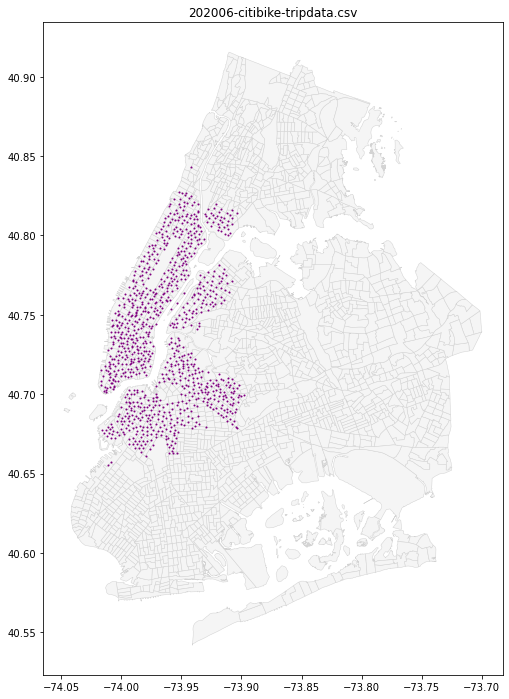

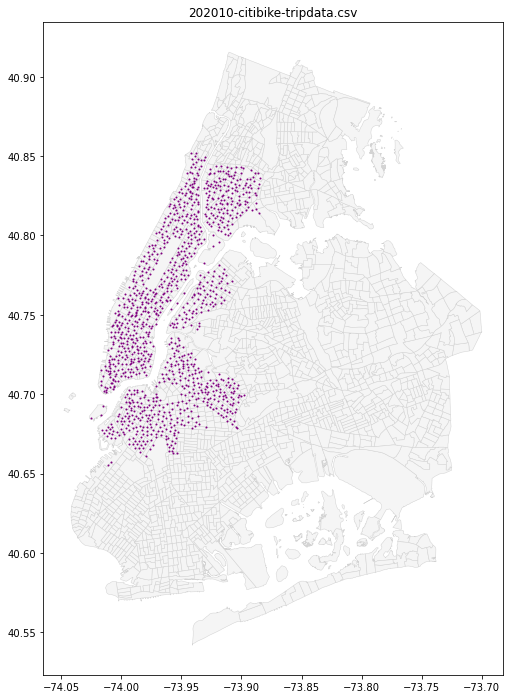

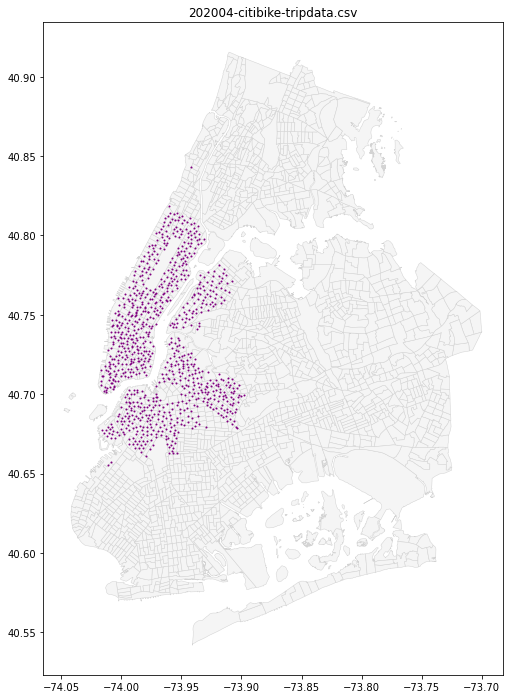

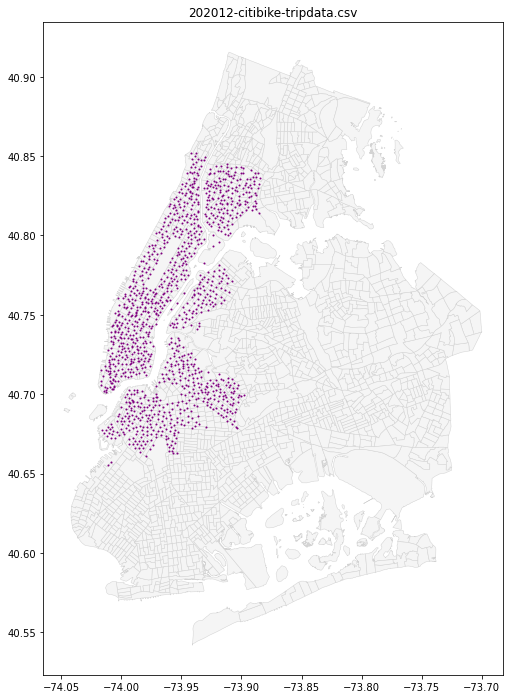

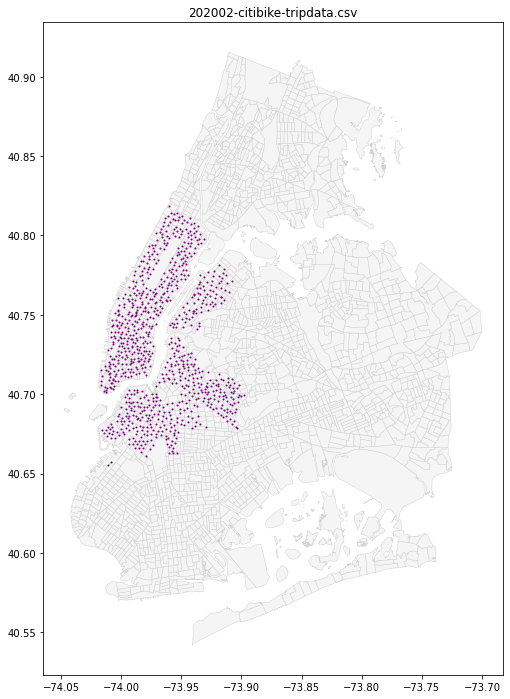

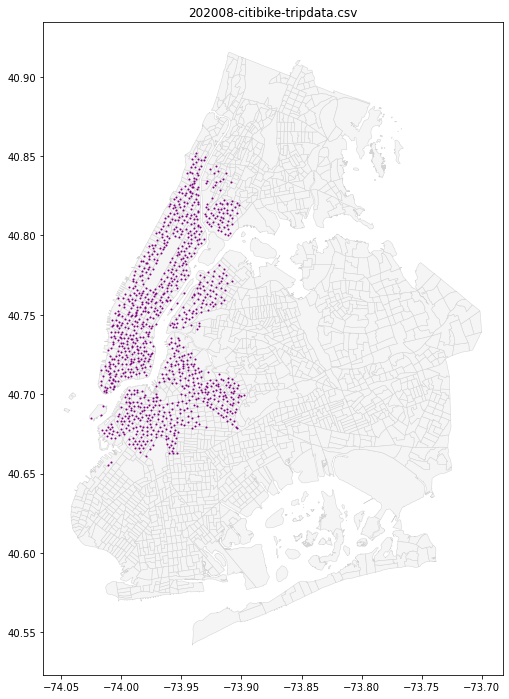

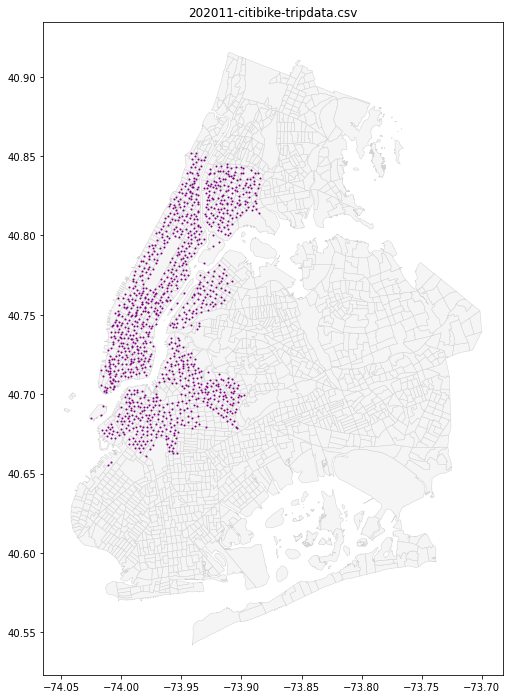

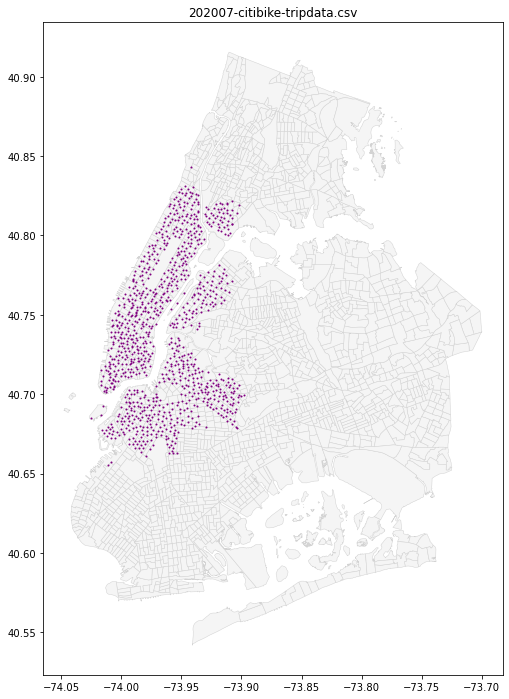

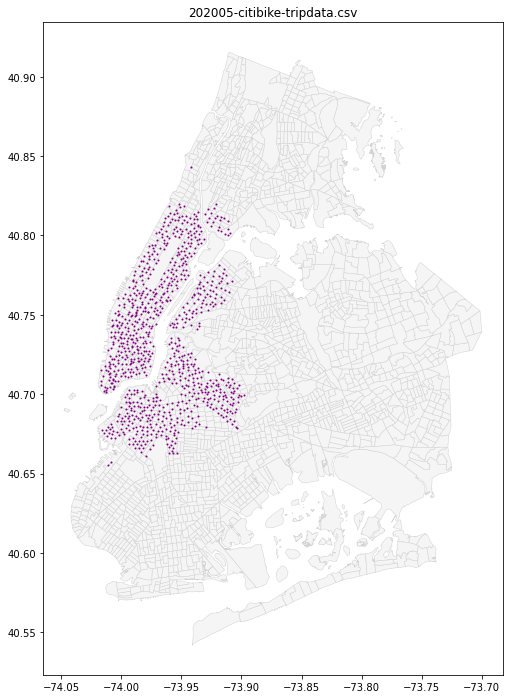

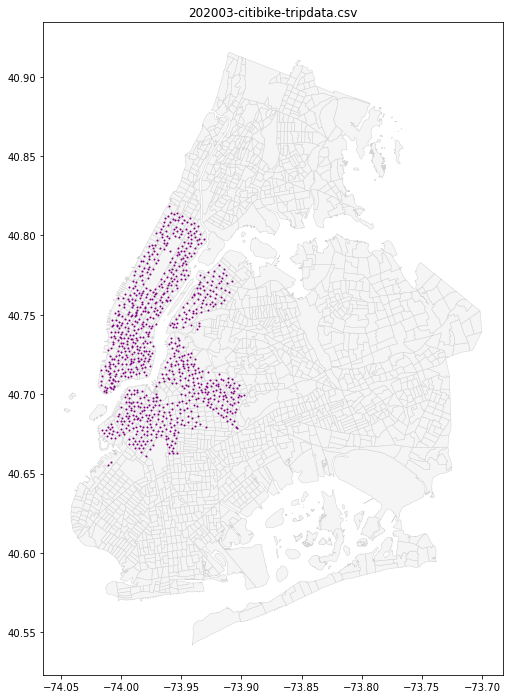

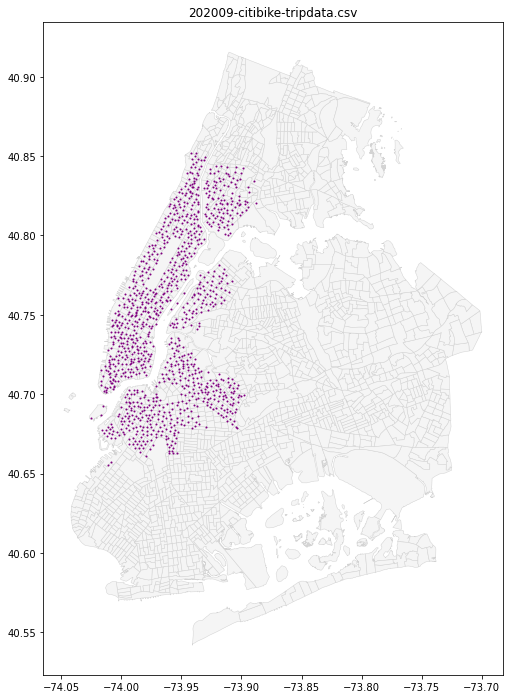

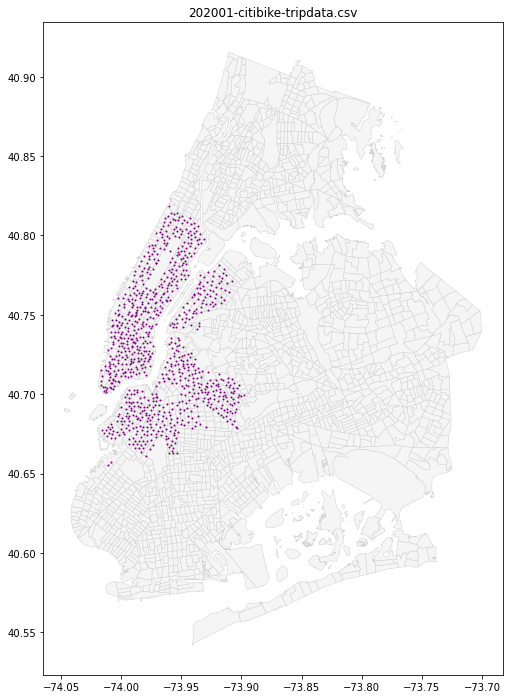

In [18]:
count = 0
for df in filtered_gdf:
    ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
    result = df.plot(ax=ax, color="Purple", markersize=1)
    plt.title(filenames[count])
    resultFig = result.get_figure()
    resultFig.savefig("../Results/stations_nyc/stations_" + filenames[count] + ".png")
    count+=1

In [19]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("../Results/stations_nyc/*.png")
imgs = sorted(imgs)

for i in imgs:
    print(i)
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('../Results/stations_nyc/stations_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=900, loop=10)

../Results/stations_nyc/201312nyc.png
../Results/stations_nyc/201508nyc.png
../Results/stations_nyc/201510nyc.png
../Results/stations_nyc/201702nyc.png
../Results/stations_nyc/201809nyc.png
../Results/stations_nyc/201912nyc.png
../Results/stations_nyc/202001nyc.png
../Results/stations_nyc/202010nyc.png
../Results/stations_nyc/202101nyc.png
../Results/stations_nyc/stations_201306-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201307-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201308-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201309-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201310-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201311-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201312-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201401-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201402-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201403-citibike-tripdata.csv.pn

![gif](../Results/stations_nyc/stations_gif.gif)

Text(0.5, 1.0, '202006-citibike-tripdata.csv')

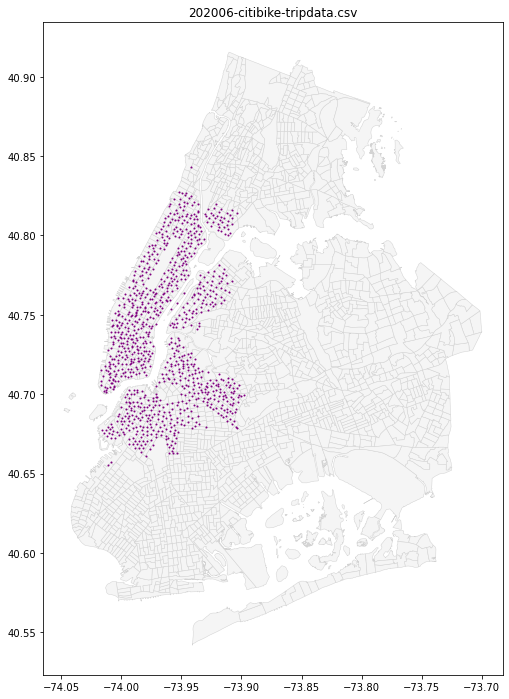

In [20]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[0].plot(ax=ax, color="Purple", markersize=1)
plt.title(filenames[0])

In [21]:
# if a bike station is not in the latest data set then remove the census tract from the shapefile
contains = []
for row, col in cenTract.iterrows():
    for row1, col1 in filtered_gdf[1].iterrows():
        if cenTract.loc[row]['geometry'].contains(filtered_gdf[1].loc[row1]['geometry']):
            contains.append(row)

filtered_cenTract = cenTract.copy()
            
for row, col in filtered_cenTract.iterrows():
    if row not in contains:
        filtered_cenTract = filtered_cenTract.drop(row)
        
filtered_cenTract

OBJECTID CTLabel BoroCode   BoroName  CT2010 BoroCT2010 CDEligibil  \
1            2      98        1  Manhattan  009800    1009800          I   
2            3     102        1  Manhattan  010200    1010200          I   
3            4     104        1  Manhattan  010400    1010400          I   
4            5     113        1  Manhattan  011300    1011300          I   
6            7     130        1  Manhattan  013000    1013000          I   
...        ...     ...      ...        ...     ...        ...        ...   
2154      2155     131        2      Bronx  013100    2013100          E   
2159      2160      44        1  Manhattan  004400    1004400          I   
2160      2161      48        1  Manhattan  004800    1004800          I   
2163      2164     157        1  Manhattan  015700    1015700          I   
2164      2165     159        1  Manhattan  015900    1015900          I   

     NTACode                         NTAName  PUMA    Shape__Are   Shape__Len  \
1       MN19         Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811   
2       MN17           Midtown-Midtown South  3807  1.860993e+06  5687.802439   
3       MN17           Midtown-Midtown South  3807  1.864600e+06  5693.036367   
4       MN17           Midtown-Midtown South  3807  1.890907e+06  5699.860641   
6       MN40   Upper East Side-Carnegie Hill  3805  1.918145e+06  5807.972956   
...      ...                             ...   ...           ...          ...   
2154    BX33                        Longwood  3710  2.477239e+06  6532.973101   
2159    MN50  Stuyvesant Town-Cooper Village  3808  4.277835e+06  9684.762936   
2160    MN21                        Gramercy  3808  1.920852e+06  5539.378859   
2163    MN14                  Lincoln Square  3806  1.958587e+06  5778.309362   
2164    MN14                  Lincoln Square  3806  1.874866e+06  6435.884250   

                                               geometry  
1     POLYGON ((-73.96433 40.75639, -73.96479 40.755...  
2     POLYGON ((-73.97124 40.76094, -73.97170 40.760...  
3     POLYGON ((-73.97446 40.76230, -73.97492 40.761...  
4     POLYGON ((-73.98412 40.75485, -73.98460 40.754...  
6     POLYGON ((-73.96148 40.77433, -73.96194 40.773...  
...                                                 ...  
2154  POLYGON ((-73.89484 40.82626, -73.89487 40.823...  
2159  MULTIPOLYGON (((-73.97157 40.72770, -73.97157 ...  
2160  POLYGON ((-73.98021 40.73439, -73.98038 40.734...  
2163  POLYGON ((-73.97500 40.77754, -73.97546 40.776...  
2164  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  

[537 rows x 13 columns]

Text(0.5, 1.0, '202010-citibike-tripdata.csv')

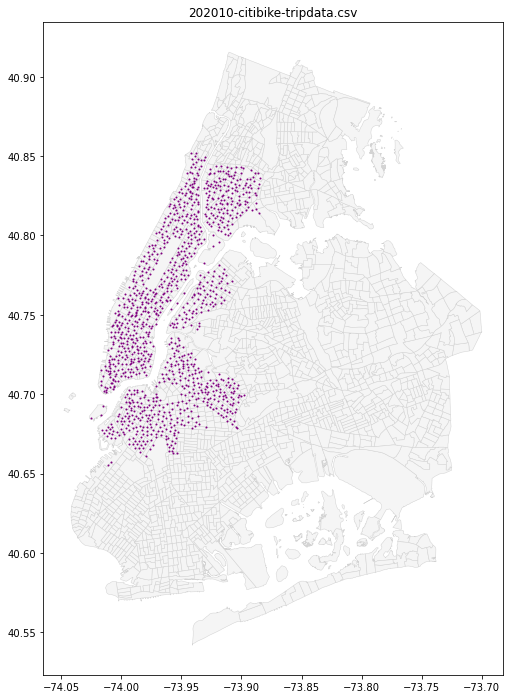

In [22]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[1].plot(ax=ax, color="Purple", markersize=1)
plt.title(filenames[1])

In [122]:
from cenpy import products
#https://api.census.gov/data/2019/acs/acs5/variables.html variables for census
NYC = products.ACS(2019).from_place('New York City, NY', level='tract',
                                   variables = ['B01003_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E','B02001_005E',
                                               'B02001_006E','B02001_007E', 'B08006_001E', 'B08006_002E', 'B08006_003E',
                                               'B08006_004E', 'B08006_008E', 'B08006_009E', 'B08006_0014E',
                                               'B08006_0015E', 'B08006_0016E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [123]:
NYC.head(5)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-8259606.540 4945204.550, -8259551.5...   
1  36085017012  POLYGON ((-8257822.870 4945745.990, -8257700.4...   
2  36085017011  POLYGON ((-8257258.590 4945434.980, -8257233.1...   
3  36085027302  POLYGON ((-8253857.890 4952048.580, -8253853.3...   
4  36085021300  POLYGON ((-8253987.250 4958121.700, -8253968.4...   

   B01003_001E  B02001_002E  B02001_003E  B02001_004E  B02001_005E  \
0       4485.0       4198.0          0.0          0.0        188.0   
1       4321.0       3882.0         48.0          0.0        235.0   
2       4865.0       4732.0          2.0          0.0         69.0   
3       4060.0       3230.0          7.0          0.0        793.0   
4       4681.0       3062.0        776.0        228.0        283.0   

   B02001_006E  B02001_007E  B08006_001E  B08006_002E  B08006_003E  \
0          0.0          0.0       1915.0       1532.0       1373.0   
1         18.0         80.0       1835.0       1397.0       1247.0   
2          0.0          0.0       2238.0       1561.0       1366.0   
3          0.0          0.0       1587.0       1305.0       1066.0   
4          0.0        158.0       1942.0       1126.0       1009.0   

   B08006_004E  B08006_008E  B08006_009E state county   tract  
0        159.0        233.0        138.0    36    085  017009  
1        150.0        346.0        247.0    36    085  017012  
2        195.0        611.0        388.0    36    085  017011  
3        239.0        214.0        156.0    36    085  027302  
4        117.0        648.0        518.0    36    085  021300

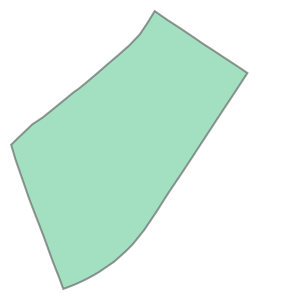

In [126]:
NYC.loc[0]['geometry']

In [72]:
cur_nyc_df = pd.read_csv('../Data/NYC/stations/nyc_202101_stations.csv')

In [58]:
cur_nyc_df.head(1)

Unnamed: 0  station_id                station_name        lat       long
0           0        3581  Underhill Ave & Lincoln Pl  40.674012 -73.967146

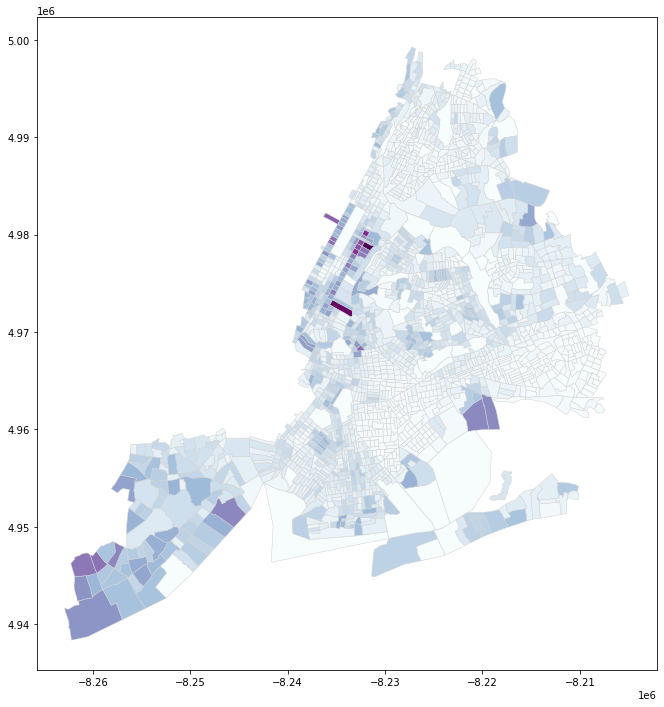

In [59]:
ax = NYC.plot(column = "B02001_002E", cmap="BuPu",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
# cur_nyc_df.plot(ax=ax, color="Red", markersize=1)

In [60]:
from pyproj import Proj
'''declare NAD83 State plane coordinate system for South Penn'''
p1 = Proj('+proj=lcc +lat_1=40.96666666666667 +lat_2=39.93333333333333 +lat_0=39.33333333333334 +lon_0=-77.75 +x_0=600000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
'''Test with sample latitude and longitude from Pittsburgh'''
sample_lat = 40.674012
sample_long = -73.967146
'''convert to state plane coordinates in meters'''
sp_lat, sp_long = p1(latitude=sample_lat, longitude=sample_long)
print('sp_lat = {}, sp_long = {}'.format(sp_lat, sp_long))
'''convert back to test'''
long, lat = p1(sp_lat, sp_long, inverse=True)
print('lat = {}, long = {}'.format(lat, long))

sp_lat = 919725.7155726266, sp_long = 155712.54681206113
lat = 40.67401199999982, long = -73.967146


In [61]:
for row,col in cur_nyc_df.iterrows():
    cur_nyc_df.at[row, 'sp_lat'], cur_nyc_df.at[row, 'sp_long'] = p1(latitude=cur_nyc_df.loc[row]['lat'], longitude = cur_nyc_df.loc[row]['long'])

In [62]:
cur_nyc_df

Unnamed: 0  station_id                station_name        lat  \
0              0        3581  Underhill Ave & Lincoln Pl  40.674012   
1              1        3144          E 81 St & Park Ave  40.776777   
2              2         534     Water - Whitehall Plaza  40.702551   
3              3         319        Fulton St & Broadway  40.711066   
4              4        3294          E 91 St & Park Ave  40.783502   
...          ...         ...                         ...        ...   
1216        1216        4272         Ditmars Ave & 43 St  40.771203   
1217        1217        4288        Steinway St & 21 Ave  40.774798   
1218        1218        4275         21 Ave & Shore Blvd  40.783956   
1219        1219        4327              21 St & 21 Ave  40.782465   
1220        1220        4321        21 Ave & Crescent St  40.780478   

           long         sp_lat        sp_long  
0    -73.967146  919725.739486  155712.581181  
1    -73.959010  919923.250218  167143.104755  
2    -74.012723  915741.768695  158714.748392  
3    -74.009447  915978.368401  159671.205428  
4    -73.955327  920201.766412  167902.507586  
...         ...            ...            ...  
1216 -73.903865  924600.961998  166725.937969  
1217 -73.903787  924590.159385  167125.059276  
1218 -73.916894  923440.600360  168092.976609  
1219 -73.914527  923647.392894  167936.233355  
1220 -73.912212  923852.201683  167724.277895  

[1221 rows x 7 columns]

In [63]:
cenTract.head(1)

OBJECTID CTLabel BoroCode   BoroName   tract BoroCT2010 CDEligibil NTACode  \
1         2      98        1  Manhattan  009800    1009800          I    MN19   

                   NTAName  PUMA    Shape__Are   Shape__Len  \
1  Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811   

                                            geometry  
1  POLYGON ((-73.96433 40.75639, -73.96479 40.755...

In [64]:
NYC.head(1)

GEOID                                           geometry  \
0  36085017009  POLYGON ((-8259606.540 4945204.550, -8259551.5...   

   B01003_001E  B02001_002E  B02001_003E  B02001_004E  B02001_005E  \
0       4485.0       4198.0          0.0          0.0        188.0   

   B02001_006E  B02001_007E  B08006_001E  B08006_002E  B08006_003E  \
0          0.0          0.0       1915.0       1532.0       1373.0   

   B08006_004E  B08006_008E  B08006_009E state county   tract  
0        159.0        233.0        138.0    36    085  017009

In [65]:
NYC = NYC.drop(columns=['geometry', 'GEOID', 'county'])
NYC.head(1)

B01003_001E  B02001_002E  B02001_003E  B02001_004E  B02001_005E  \
0       4485.0       4198.0          0.0          0.0        188.0   

   B02001_006E  B02001_007E  B08006_001E  B08006_002E  B08006_003E  \
0          0.0          0.0       1915.0       1532.0       1373.0   

   B08006_004E  B08006_008E  B08006_009E state   tract  
0        159.0        233.0        138.0    36  017009

In [43]:
type(cenTract.loc[1]['CT2010'])

str

In [86]:
type(NYC.loc[0]['tract'])

str

In [87]:
cenTract.loc[1488]

OBJECTID                                                   1489
CTLabel                                                  317.03
BoroCode                                                      1
BoroName                                              Manhattan
CT2010                                                   031703
BoroCT2010                                              1031703
CDEligibil                                                    I
NTACode                                                    MN25
NTAName                       Battery Park City-Lower Manhattan
PUMA                                                       3810
Shape__Are                                        2525854.97879
Shape__Len                                          8284.039993
geometry      POLYGON ((-74.0128680825654 40.717184357854, -...
Name: 1488, dtype: object

In [88]:
cenTract = cenTract.rename(columns={'CT2010':'tract'})
cenTract = cenTract.reset_index()
cenTract = cenTract.drop(columns = ['CDEligibil', 'NTACode', 'NTAName', 'PUMA', 'BoroName', 'index', 'BoroCode', 
                                   'CTLabel', 'BoroCT2010'])
cenTract.head(1)

OBJECTID   tract    Shape__Are   Shape__Len  \
0         1  000900  2.497010e+06  7729.016794   

                                            geometry  
0  POLYGON ((-74.07921 40.64344, -74.07914 40.643...

In [89]:
acs_nyc_df = cenTract.merge(NYC, on='tract')
acs_nyc_df

OBJECTID   tract    Shape__Are    Shape__Len  \
0            1  000900  2.497010e+06   7729.016794   
1            1  000900  2.497010e+06   7729.016794   
2            1  000900  2.497010e+06   7729.016794   
3         1022  000900  1.737777e+06   5883.375467   
4         1022  000900  1.737777e+06   5883.375467   
...        ...     ...           ...           ...   
4414      2142  107800  5.449630e+06  13423.840025   
4415      2150  050100  1.857456e+06   6239.748810   
4416      2156  074400  1.844717e+06   5612.220206   
4417      2157  074600  2.159994e+06   7730.189160   
4418      2163  050801  8.437396e+05   3754.807787   

                                               geometry  B01003_001E  \
0     POLYGON ((-74.07921 40.64344, -74.07914 40.643...       1796.0   
1     POLYGON ((-74.07921 40.64344, -74.07914 40.643...       4518.0   
2     POLYGON ((-74.07921 40.64344, -74.07914 40.643...       1510.0   
3     POLYGON ((-73.99067 40.69458, -73.99045 40.693...       1796.0   
4     POLYGON ((-73.99067 40.69458, -73.99045 40.693...       4518.0   
...                                                 ...          ...   
4414  POLYGON ((-73.86718 40.66046, -73.86735 40.660...       4662.0   
4415  POLYGON ((-73.94676 40.71862, -73.94675 40.718...       3177.0   
4416  POLYGON ((-73.94081 40.62013, -73.94123 40.620...       2777.0   
4417  POLYGON ((-73.93687 40.62026, -73.93696 40.620...       2577.0   
4418  POLYGON ((-73.95871 40.65040, -73.95998 40.650...       4075.0   

      B02001_002E  B02001_003E  B02001_004E  B02001_005E  B02001_006E  \
0          1226.0         88.0          0.0        328.0         17.0   
1          3524.0        197.0          0.0        498.0          0.0   
2           656.0        532.0          0.0        132.0          0.0   
3          1226.0         88.0          0.0        328.0         17.0   
4          3524.0        197.0          0.0        498.0          0.0   
...           ...          ...          ...          ...          ...   
4414        228.0       4054.0          0.0          0.0          0.0   
4415       2540.0         44.0         51.0        196.0          0.0   
4416       2372.0        271.0          0.0         74.0          0.0   
4417       1818.0        510.0          0.0         93.0          0.0   
4418        846.0       2726.0          0.0         92.0          0.0   

      B02001_007E  B08006_001E  B08006_002E  B08006_003E  B08006_004E  \
0            64.0       1312.0         74.0         65.0          9.0   
1            40.0       2881.0         86.0         86.0          0.0   
2            41.0        633.0        155.0        136.0         19.0   
3            64.0       1312.0         74.0         65.0          9.0   
4            40.0       2881.0         86.0         86.0          0.0   
...           ...          ...          ...          ...          ...   
4414        318.0       2178.0        382.0        340.0         42.0   
4415        272.0       2001.0        139.0        129.0         10.0   
4416         28.0        917.0        516.0        418.0         98.0   
4417        101.0       1123.0        537.0        448.0         89.0   
4418        391.0       1913.0        163.0        156.0          7.0   

      B08006_008E  B08006_009E state  
0           729.0          0.0    36  
1          2231.0         20.0    36  
2           418.0        113.0    36  
3           729.0          0.0    36  
4          2231.0         20.0    36  
...           ...          ...   ...  
4414       1554.0        439.0    36  
4415       1472.0         11.0    36  
4416        245.0         85.0    36  
4417        467.0         81.0    36  
4418       1581.0        220.0    36  

[4419 rows x 19 columns]

In [80]:
cenTract

OBJECTID   tract    Shape__Are   Shape__Len  \
0            1  000900  2.497010e+06  7729.016794   
1            2  009800  1.906016e+06  5534.199811   
2            3  010200  1.860993e+06  5687.802439   
3            4  010400  1.864600e+06  5693.036367   
4            5  011300  1.890907e+06  5699.860641   
...        ...     ...           ...          ...   
2160      2161  004800  1.920852e+06  5539.378859   
2161      2162  050600  1.771606e+06  6696.151115   
2162      2163  050801  8.437396e+05  3754.807787   
2163      2164  015700  1.958587e+06  5778.309362   
2164      2165  015900  1.874866e+06  6435.884250   

                                               geometry  
0     POLYGON ((-74.07921 40.64344, -74.07914 40.643...  
1     POLYGON ((-73.96433 40.75639, -73.96479 40.755...  
2     POLYGON ((-73.97124 40.76094, -73.97170 40.760...  
3     POLYGON ((-73.97446 40.76230, -73.97492 40.761...  
4     POLYGON ((-73.98412 40.75485, -73.98460 40.754...  
...                                                 ...  
2160  POLYGON ((-73.98021 40.73439, -73.98038 40.734...  
2161  POLYGON ((-73.96219 40.64980, -73.96308 40.649...  
2162  POLYGON ((-73.95871 40.65040, -73.95998 40.650...  
2163  POLYGON ((-73.97500 40.77754, -73.97546 40.776...  
2164  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  

[2165 rows x 5 columns]

In [82]:
set(cenTract['tract']) - set(NYC['tract'])

{'000300',
 '000500',
 '012900',
 '022301',
 '022302',
 '023700',
 '024401',
 '024402',
 '029102',
 '029301',
 '031703',
 '031704',
 '031902',
 '045102',
 '061400',
 '061602',
 '066400',
 '071600',
 '099705',
 '099802',
 '100801',
 '101001',
 '101002',
 '103201',
 '103202',
 '107202',
 '147900',
 '148300',
 '150702',
 '152902',
 '155101',
 '155102',
 '157901',
 '157903',
 '161700',
 '162100'}

In [84]:
cenTract[cenTract['tract'] == '031703']

OBJECTID   tract    Shape__Are   Shape__Len  \
1488      1489  031703  2.525855e+06  8284.039993   

                                               geometry  
1488  POLYGON ((-74.01287 40.71718, -74.01308 40.716...

In [93]:
mydict = {'tract': NYC['tract'],
          'biking': NYC['B08006_008E'],
         'cenTract': cenTract['tract']}

dftest = pd.DataFrame(mydict)

In [94]:
mylist = list(NYC['tract'])
mylist

['017009',
 '017012',
 '017011',
 '027302',
 '021300',
 '012200',
 '014700',
 '002001',
 '007400',
 '001800',
 '005201',
 '006600',
 '016000',
 '013800',
 '015200',
 '007000',
 '016600',
 '007600',
 '017600',
 '008600',
 '019600',
 '000900',
 '008800',
 '004900',
 '011400',
 '006300',
 '000501',
 '022000',
 '005900',
 '014500',
 '033000',
 '011700',
 '012100',
 '010100',
 '024800',
 '029800',
 '007100',
 '013900',
 '003001',
 '006800',
 '007400',
 '003200',
 '015100',
 '002201',
 '009600',
 '015300',
 '047800',
 '002602',
 '010400',
 '043600',
 '043400',
 '007000',
 '041000',
 '040000',
 '007800',
 '009200',
 '045000',
 '018100',
 '044800',
 '045200',
 '010800',
 '013000',
 '004400',
 '041600',
 '035200',
 '051800',
 '012800',
 '051002',
 '058800',
 '052300',
 '053800',
 '056500',
 '055800',
 '021900',
 '061004',
 '059000',
 '058600',
 '016002',
 '051700',
 '052900',
 '052700',
 '025300',
 '014602',
 '021500',
 '024900',
 '075600',
 '081800',
 '050300',
 '015601',
 '074800',
 '061200',

In [92]:
dftest

tract  biking cenTract
0     017009   233.0   000900
1     017012   346.0   009800
2     017011   611.0   010200
3     027302   214.0   010400
4     021300   648.0   011300
...      ...     ...      ...
2160     NaN     NaN   004800
2161     NaN     NaN   050600
2162     NaN     NaN   050801
2163     NaN     NaN   015700
2164     NaN     NaN   015900

[2165 rows x 3 columns]

In [96]:
for row,col in cenTract.iterrows():
    if cenTract.loc[row]['tract'] not in mylist:
        print("row: " + str(row))
        print("tract: " + str(cenTract.loc[row]['tract']))
        cenTract = cenTract.drop(row)

row: 484
tract: 061400
row: 536
tract: 157901
row: 538
tract: 157903
row: 741
tract: 100801
row: 841
tract: 031902
row: 856
tract: 148300
row: 873
tract: 103201
row: 1027
tract: 161700
row: 1233
tract: 022301
row: 1280
tract: 099802
row: 1304
tract: 147900
row: 1305
tract: 150702
row: 1381
tract: 000300
row: 1382
tract: 029301
row: 1409
tract: 045102
row: 1429
tract: 022302
row: 1434
tract: 162100
row: 1439
tract: 061602
row: 1450
tract: 155101
row: 1457
tract: 099705
row: 1465
tract: 024402
row: 1488
tract: 031703
row: 1493
tract: 012900
row: 1525
tract: 031704
row: 1600
tract: 152902
row: 1619
tract: 024401
row: 1659
tract: 023700
row: 1795
tract: 103202
row: 1971
tract: 029102
row: 2008
tract: 155102
row: 2013
tract: 066400
row: 2028
tract: 071600
row: 2039
tract: 101001
row: 2040
tract: 101002
row: 2053
tract: 107202
row: 2081
tract: 000500


In [98]:
cenTract

OBJECTID   tract    Shape__Are   Shape__Len  \
0            1  000900  2.497010e+06  7729.016794   
1            2  009800  1.906016e+06  5534.199811   
2            3  010200  1.860993e+06  5687.802439   
3            4  010400  1.864600e+06  5693.036367   
4            5  011300  1.890907e+06  5699.860641   
...        ...     ...           ...          ...   
2160      2161  004800  1.920852e+06  5539.378859   
2161      2162  050600  1.771606e+06  6696.151115   
2162      2163  050801  8.437396e+05  3754.807787   
2163      2164  015700  1.958587e+06  5778.309362   
2164      2165  015900  1.874866e+06  6435.884250   

                                               geometry  
0     POLYGON ((-74.07921 40.64344, -74.07914 40.643...  
1     POLYGON ((-73.96433 40.75639, -73.96479 40.755...  
2     POLYGON ((-73.97124 40.76094, -73.97170 40.760...  
3     POLYGON ((-73.97446 40.76230, -73.97492 40.761...  
4     POLYGON ((-73.98412 40.75485, -73.98460 40.754...  
...                                                 ...  
2160  POLYGON ((-73.98021 40.73439, -73.98038 40.734...  
2161  POLYGON ((-73.96219 40.64980, -73.96308 40.649...  
2162  POLYGON ((-73.95871 40.65040, -73.95998 40.650...  
2163  POLYGON ((-73.97500 40.77754, -73.97546 40.776...  
2164  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  

[2129 rows x 5 columns]

In [115]:
cenlist = list(cenTract['tract'])
nyclist = list(NYC['tract'])
print("cen: " + str(len(cenlist)))
print("nyc: " + str(len(nyclist)))

cen: 2129
nyc: 2061


In [119]:
for i in range(len(cenlist)):
    print(cenlist[i])
    if cenlist[i] not in nyclist:
        print(cenlist[i])
        cenlist.remove(i)

000900
009800
010200
010400
011300
011402
013000
014000
014801
018400
019000
020600
024900
026100
026300
026900
027700
000501
004100
005800
006000
006700
006900
007400
007800
008000
009800
010100
010200
010400
010800
011000
011400
012801
013000
013300
013700
013900
015100
015300
015500
015700
017000
017800
018600
018800
019000
019200
019400
019500
019600
019700
019800
020400
020800
021000
021200
021400
021900
022000
022100
022200
022700
023500
023600
023800
024000
024200
024500
024600
024800
024900
025000
025200
025400
025600
025800
026000
026200
026300
026400
026600
026700
026800
026900
027000
027200
027300
027400
027600
027800
027900
028400
028501
028800
029100
029300
029800
030000
030900
031701
032900
033100
033700
033900
034100
034200
038800
039600
039700
039900
040100
040400
040600
040800
041300
041401
041500
041700
041800
041900
042000
042100
042600
042800
042900
043000
043100
043200
043300
043400
043500
043600
043900
044000
044100
044200
044300
044400
044600
045200
045400
045600

In [ ]:
for i in range(len(nyclist)):
    if nyclist[i] not in cenlist:
        print(cenlist[i])
        cenlist.remove(i)